In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\Iris.csv")

In [84]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [85]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [86]:
df.set_index('Id',inplace=True)

In [87]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [89]:
df.duplicated().sum()

3

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df1 = df.iloc[:,:-1]
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [92]:
#we will use df1 data for clustering

# Model building

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sc= StandardScaler()

In [95]:
x = pd.DataFrame(sc.fit_transform(df1),columns= df1.columns)

In [96]:
from sklearn.cluster import KMeans

In [97]:
km = KMeans()

km.fit_predict(x)

array([4, 0, 0, 0, 4, 5, 4, 4, 0, 0, 4, 4, 0, 0, 5, 5, 5, 4, 5, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 5, 5, 0, 4, 0, 4, 4, 0, 0, 4, 4, 0,
       4, 0, 4, 4, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3,
       6, 3, 1, 1, 6, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 6, 1, 1, 1, 6, 1, 3,
       3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 2, 6, 7, 1, 2, 7, 3, 7, 6, 2, 2, 6,
       2, 6, 6, 2, 1, 2, 7, 6, 2, 6, 7, 6, 2, 2, 6, 1, 6, 7, 7, 2, 6, 1,
       6, 7, 2, 1, 1, 2, 2, 2, 2, 2, 2, 6, 1, 2, 1])

In [98]:
##Elbow graph

In [77]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

In [78]:
wccs=[]

for i in range(1,25):
    km =KMeans(n_clusters=i)
    km.fit_predict(x)
    wccs.append(km.inertia_)

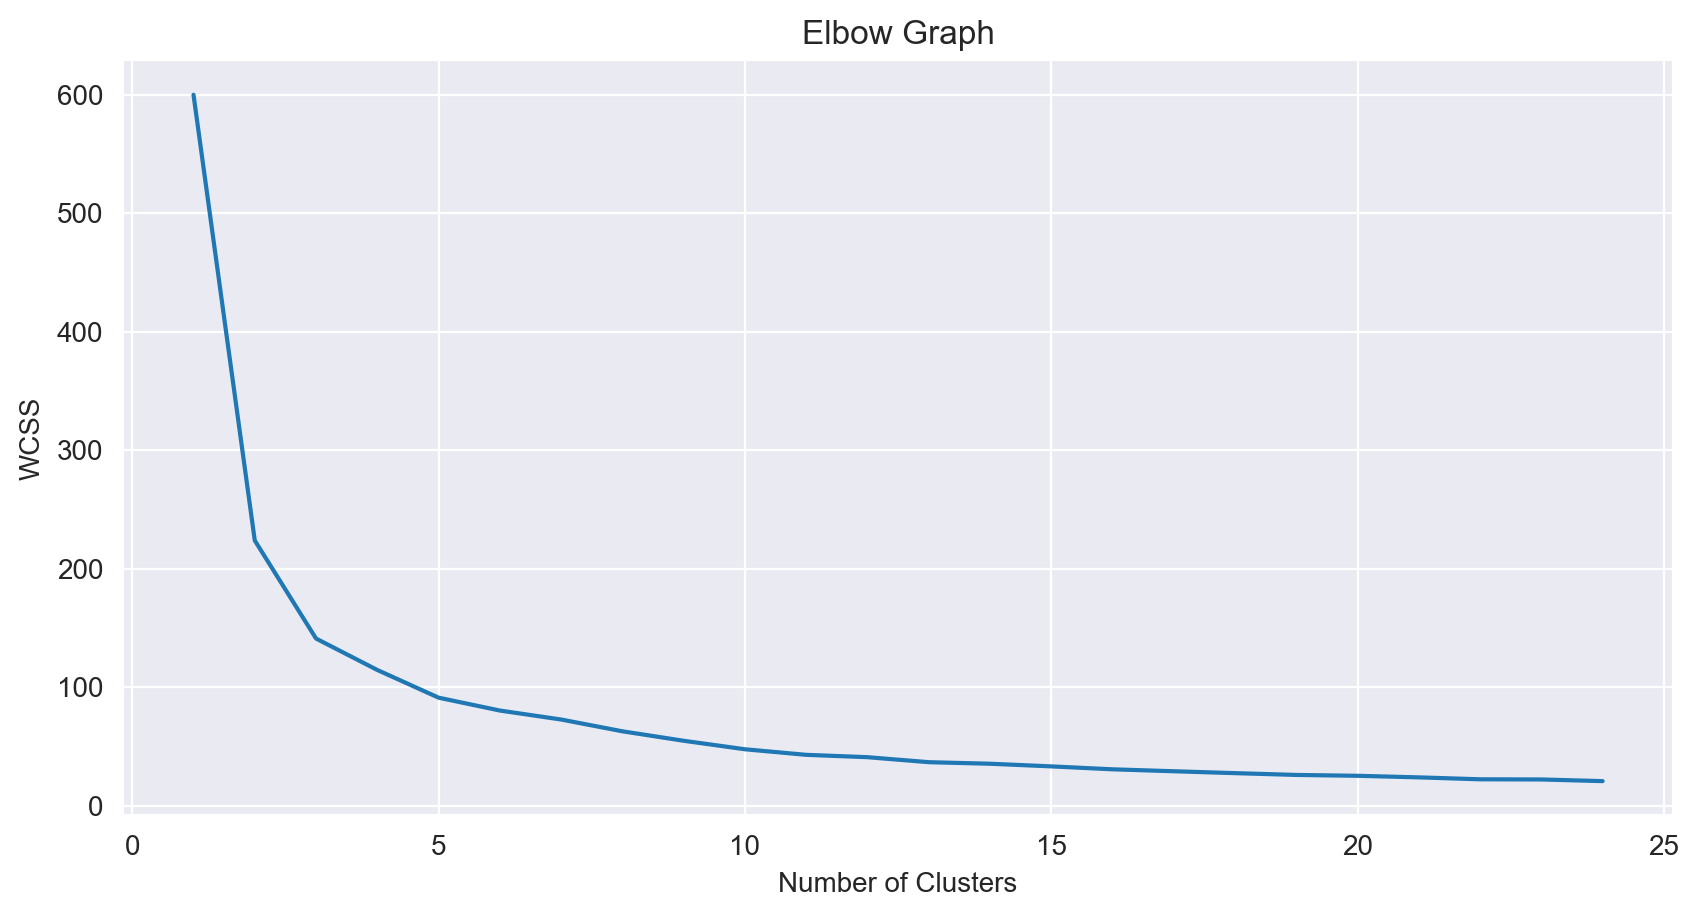

In [19]:
plt.plot(range(1,25), wccs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph');

# From the above elbow graph, we got the optimal cluster number is 5

In [99]:
km = KMeans(n_clusters=5)

y= km.fit_predict(x)

In [100]:
df['Cluster']= y

In [101]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,3
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,3
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,1
148,6.5,3.0,5.2,2.0,Iris-virginica,1


In [102]:
df.groupby('Cluster').agg('mean')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Cluster,,,,
0,4.731818,3.122727,1.445455,0.213636
1,6.219149,2.912766,4.825532,1.614894
2,7.000000,3.159259,5.874074,2.174074
3,5.246154,3.692308,1.476923,0.280769
4,5.564000,2.492000,4.004000,1.244000
